# Pancreas glycolysis model

Mamm Genome. 2007 Jul;18(6-7):508-20. Epub 2007 May 21.  
A kinetic core model of the glucose-stimulated insulin secretion network of pancreatic beta cells.
Jiang N1, Cox RD, Hancock JM.

https://www.ncbi.nlm.nih.gov/pubmed/17514510

The model was downloaded from
https://www.ebi.ac.uk/biomodels-main/BIOMD0000000239

In [1]:
from __future__ import print_function, absolute_import
import os
import pandas as pd
from matplotlib import pyplot as plt
from sbmlutils.report import sbmlreport
import roadrunner

out_dir = "./results"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# sbmlreport
sbmlreport.create_sbml_report('BIOMD0000000239.xml', out_dir=out_dir, validate=False)

## Simulation

In [2]:
r = roadrunner.RoadRunner('BIOMD0000000239.xml')
s = r.simulate(start=0, end=1000, steps=1000)
# print(r.timeCourseSelections)

In [3]:
columns = [s.replace('[', '').replace(']', '') for s in r.timeCourseSelections]
df = pd.DataFrame(s, columns=columns)
df.head()

time       GLC       F6P       FBP       GAP       DPG       PEP   PYR_cyt  \
0   0.0  0.000011  0.000659  0.000008  0.000002  0.000299  0.000002  0.000004   
1   1.0  0.000404  0.000688  0.000243  0.000041  0.000305  0.000004  0.000051   
2   2.0  0.000697  0.000074  0.000693  0.000229  0.000864  0.000020  0.000284   
3   3.0  0.000963  0.000190  0.000449  0.000165  0.001357  0.000022  0.000353   
4   4.0  0.001213  0.000516  0.000237  0.000087  0.001657  0.000017  0.000215   

        AMP       LAC    ...          ATP       ADP    NADP_p     NADPH  \
0  0.000003  0.000340    ...     0.004500  0.000450  0.010100  0.000072   
1  0.000053  0.000350    ...     0.004347  0.000430  0.010098  0.000074   
2  0.000189  0.000510    ...     0.004197  0.000412  0.010096  0.000076   
3  0.000053  0.001133    ...     0.004050  0.000395  0.010093  0.000079   
4  0.000011  0.001715    ...     0.003904  0.000378  0.010091  0.000081   

      NAD_p      NADH         Q       QH2    Cytc3p    Cytc2p  
0  0.010100  0.000720  0.026000  0.028000  0.003000  0.000110  
1  0.009951  0.000869  0.025968  0.028032  0.002993  0.000117  
2  0.009922  0.000898  0.025944  0.028056  0.002985  0.000125  
3  0.009936  0.000884  0.025918  0.028082  0.002978  0.000132  
4  0.009957  0.000863  0.025890  0.028110  0.002971  0.000139  

[5 rows x 60 columns]

## Visualization
Compare to Figure 2 in manuscript.

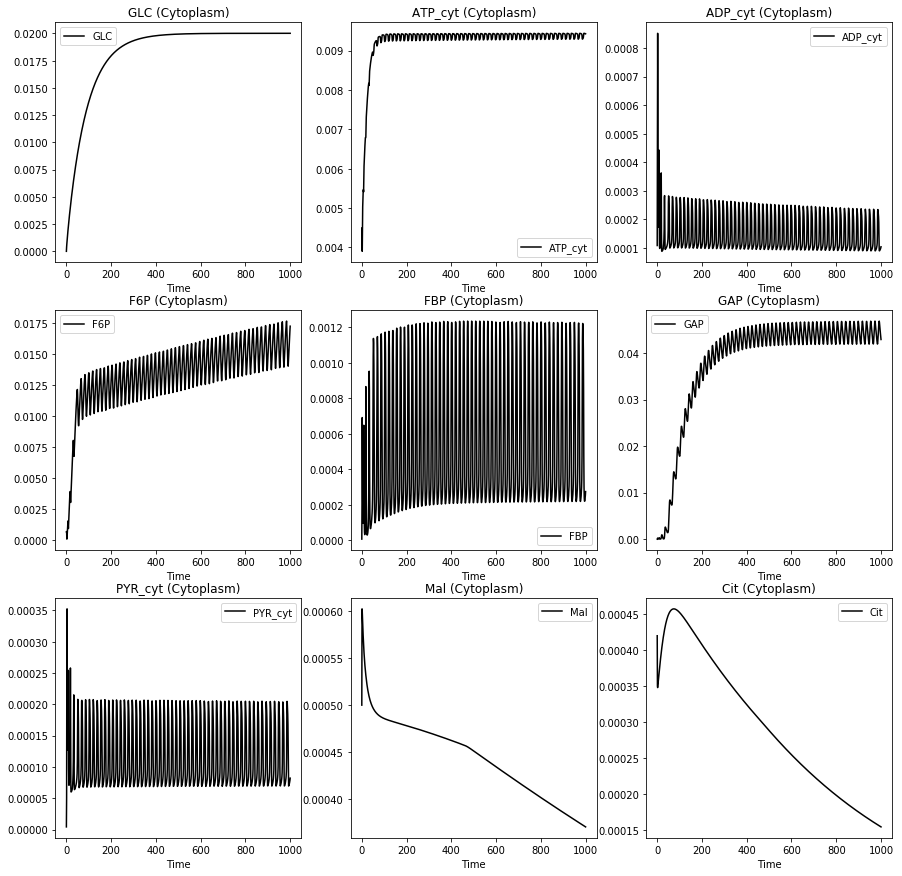

In [4]:
flatten = lambda l: [item for sublist in l for item in sublist]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = axes

for sid, ax in zip(['GLC', 'ATP_cyt', 'ADP_cyt', 'F6P', 'FBP', 'GAP', 'PYR_cyt', 'Mal', 'Cit'],
                   flatten(axes)):
    # print(ax, sid)
    ax.set_title('{} (Cytoplasm)'.format(sid))
    ax.plot(df.time, df[sid], color="k", label=sid)

for ax in flatten(axes):
    ax.set_xlabel("Time")
    ax.legend()
plt.show()